# Linear averaging dynamics

Let $G=(V,E,W)$ be a weighted graph, and $x(t) \in \mathrm{R}^{V}$ denote the state of the nodes of the graph.

The dynamics of $x(t)$ reads

$$
x(t+1) = Px(t),
$$

where $P$ is the normalized adjacency matrix.

**Theorem**: assume that
- its condensation graph has 1 sink;
- the sink component of the graph is aperiodic;

Then,

$$
\lim_{t \to +\infty} x(t) = \alpha \mathbf{1},
$$

i.e., the agents get to consensus.

## Speed of convergence

Let us now work with undirected (the following argument holds only for undirected) connected graphs. If the graph is also aperiodic, the dynamics is guaranteed to converge to consensus.

Let $\lambda:=\max \{\lambda_2,|\lambda_n|\}$, where $\lambda_1 \ge \lambda_2 \ge \cdots \ge \lambda_n$ are the eigenvalues of $P$. $\lambda_n \ge -1$. 

The distance from consensus at time $t$ is in some sense proportional to $\lambda^t$ (see lecture notes for more details).

If $\lambda$ is close to $1$, then the convergence is slow, whereas if $\lambda$ is smaller the convergence is faster.

<span style="background-color: #0000CD">Note that for strongly connected aperiodic graphs, by Perron-Frobenius theorem, we have $\lambda_2 \neq 1, \lambda_n \neq -1$ (thus $\lambda \neq 1$), hence the convergence to consensus is always achieved. Instead, if a graph is bipartite (which implies it is periodic), then $\lambda_n = -1$, hence consensus is not achieved. Those facts are coherent with the theory of consensus.</span>

**Remark**: note that every periodic strongly connected graph can be made periodic by adding at least a selfloop in the graph.

To avoid periodicity, sometimes it is useful to introduce the **lazy dynamics** $x(t+1) = x(t)$, obtained by replacing $P$ with 

$$
P_{lazy}=\frac{P+\mathbf{I}}{2}
$$

This is equivalent to adding selfloops to each node in the graph with weight equivalent to the degree of the node itself.

An interpretation for the lazy dynamics is that nodes have some inertia in the opinion. Instead of averaging over the opinions of the neighbors, they also take into account their opinion at the previous step. In fact,

$$
x_i(t+1) = \frac{x_i(t) + \sum_{j} P_{ij} x_j(t)}{2}.
$$

Let us go back to the initial periodic example, and show that the lazy dynamics converges.

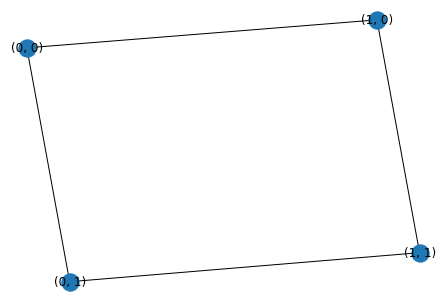

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.generators.lattice.grid_graph(dim=[2,2])

# labels of nodes are couples: (column,row)
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True)

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

In [2]:
Pl = P/2 + np.diag(np.ones(4))/2

x = np.array([1, 0, 0, 1])

for n in range(9):
    x = Pl @ x
print("x(10):", x)

x(10): [0.5 0.5 0.5 0.5]


### How fast is the convergence of lazy dynamics?

Note that $\lambda_n(P_{lazy}) = 1/2 + \lambda_n(P)/2 \ge 1/2 + (-1/2) = 0$.

Thus, for lazy dynamics $\lambda = \lambda_2$. 

In the lazy dynamics, the speed convergence is governed by $\lambda_2$. Let us now define the relaxation time as

$$
\tau_{rel} = \frac{1}{1-\lambda_2}
$$

$\lambda_2$ may be related to the level of connectedness of the graph. In particular, if the graph is well connected, $\lambda_2$ is smaller and the convergence to consensus is faster.

Let us consider a **cycle graph** with 1000 nodes.

For the cycle graph one can show that

$$
\lambda_2(P) = \cos \frac{2\pi (n-1)}{n}.
$$

<span style="background-color: #0000CD">Thus,</span>

$$
\lim_{n \to + \infty} \lambda(P_{lazy}) = \frac{1}{2} + \lim_{n \to + \infty} \frac{1}{2} \cos \frac{2\pi}{n} = \frac{1}{2} + \frac{1}{2}\left(1-\frac{4 \pi^2}{n^2}\right) = 1 - 2\frac{\pi^2}{n^2},
$$

<span style="background-color: #0000CD">and the relaxation time for the lazy dynamics on the cycle is</span>

$$
\tau_{rel} = \frac{n^2}{2\pi^2}.
$$

This means that the convergence is achieved exponentially fast with a rate that scales with $n^2$.

In [5]:
G = nx.cycle_graph(1000)

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# Construct lazy P
Pl = P/2 + np.diag(np.ones(1000))/2

# let us start with random initial conditions
x = np.random.rand(1000)

variance = np.var(x)
t=0

while (variance>0.001):
    x = Pl @ x
    t=t+1
    variance = np.var(x)

print('Number of iteration for convergence:', t)

Number of iteration for convergence: 617


Let us consider the complete graph, which is the most connected graph by definition. For the complete graph,

$$
W=\mathbf{1}\mathbf{1}'-I.
$$

Since $\mathbf{1}\mathbf{1}'$ has equal columns, it has rank $1$. Thus $\mathbf{1}\mathbf{1}'$ has $n-1$ eigenvalues equal to $0$. The remaining eigenvalue can be found by using the fact that the sum of the eigenvalues is the trace of the matrix. Since $=\mathbf{1}\mathbf{1}'-I$, the spectrum of $W$ is

$$
\sigma_W = \{n-1,-1,\cdots,-1\}
$$

Since the complete graph is regular and every node has degree $n-1$, $P=W/(n-1)$
Thus, the spectrum of $P$ is

$$
\sigma_P = \{1,-\frac{1}{n-1},\cdots,-\frac{1}{n-1}\},
$$

and $P_{lazy}$ has spectrum

$$
\sigma_{P_{lazy}} = \{1,-\frac{1}{2(n-1)}+\frac{1}{2},\cdots,-\frac{1}{2(n-1)}+\frac{1}{2}\}
$$

This implies that $\lambda_2 = \frac{1}{2}-\frac{1}{2(n-1)} = \frac{n-2}{2(n-1)}$ and the relaxation time for large $n$ in the complete graph tends

$$
\lim_{n \to +\infty} \tau_{rel} = 2,
$$

i.e., even for infinite $n$ the relaxation time is finite.

In [6]:
G = nx.complete_graph(1000)

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# Construct lazy P
Pl = P/2 + np.diag(np.ones(1000))/2

# let us start with random initial conditions
x = np.random.rand(1000)

variance = np.var(x)
n=0

while (variance>0.001):
    x = Pl @ x
    n=n+1
    variance = np.var(x)

print('Number of iteration for convergence:', n)

Number of iteration for convergence: 4


### <span style="background-color: #00FF00">Ratio bottleneck</span>

**Definition**: the ratio bottleneck (for simple graphs) is

\begin{equation}
\begin{aligned}
	\Phi = \ & \underset{\substack{\mathcal{U} \subset \mathcal{V}: \\ 0<w_{\mathcal{U}} \le \frac{1}{2} \mathbf{1}' w}}{\min}
	& & \frac{|\partial_{\mathcal{U}}|}{w_{\mathcal{U}}}
\end{aligned}
\end{equation}

with $\partial_{\mathcal{U}} = \{(i,j)\ \in \mathcal{E}: i \in \mathcal{U}, j \in \mathcal{V} \setminus \mathcal{U}\}$ boundary of the graph and $w_{\mathcal{U}} = \sum_{i \in \mathcal{U}} w_i$.

The ratio bottleneck is a measure of connectedness of the graph, and is related to $\lambda_2$. The higher $\lambda_2$ is, the less connected the graph is, the smaller is $\Phi$, and the slower the convergence is. In particular,

$$
\frac{1}{2} \Phi^2 \le 1-\lambda_2 \le 2 \Phi
$$

**<span style="background-color: #00FF00">Example: complete graph**</span>

The properties of a subset $\mathcal{U}$ are completeley determined by its cardinality. Let us consider a complete graph with $n$ nodes, and let $\mathcal{U}_m$ denote an arbitrary subset of $m$ nodes of the complete graph. Its boundary has cardinality $|\partial_{\mathcal{U}_m}| = m(n-m)$, thus

\begin{equation}
\begin{aligned}
	\Phi = \ & \underset{m \le n/2}{\min}
	& & \frac{m(n-m)}{m(n-1)} \rightarrow \frac{1}{2}
\end{aligned}
\end{equation}

as $n \to +\infty$, and

$$
\frac{1}{8} \le 1-\lambda_2 \le 1, \qquad 8 \ge \tau \ge 1
$$

**<span style="background-color: #00FF00">Example: barbell graph**</span>

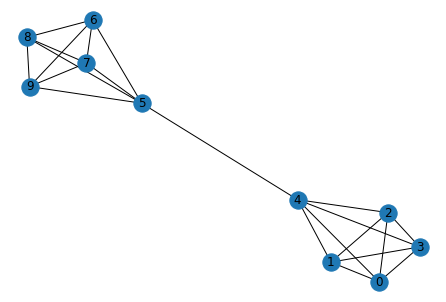

In [7]:
G = nx.barbell_graph(5,0)

pos = nx.spring_layout(G) 
nx.draw(G, with_labels=True)

The bottleneck is clearly to select one of the two complete components of the graph.
For that $\mathcal{U}$,

$$
|\partial_{\mathcal{U}} = 1|, \quad w_{\mathcal{U}} = n(n-1)+1,
$$

where $2n$ is the order of the graph. Thus, for large $n$

$$
\Phi = \frac{1}{n^2-n+1} \rightarrow 0,
$$

which implies that $\lambda_2 \to 1$, thus the relaxation time diverges for large $n$.

**<span style="background-color: #00FF00">Question</span>**: is the convergence always slow? 
    
**Answer**: No, it depends on the initial condition.

While $\lambda_2$ describes a worst-case scenario for the speed of convergence, it might be that for some initial condition the convergence is fast!

For instance, let us compare a random initial condition with an initial condition which has a high disagreement along the two components of the bottleneck of the graph.

In [9]:
G = nx.barbell_graph(200,0)

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# Construct lazy P
Pl = P/2 + np.diag(np.ones(G.number_of_nodes()))/2

# let us start with an initial condition in which each complete subgraphs has (almost) half zeros and half ones
# x = np.random.rand(G.number_of_nodes())>1/2
x = np.zeros(G.number_of_nodes())
for i in range(G.number_of_nodes()):
    if i % 2 == 0:
        x[i] = 1

variance = np.var(x)
t=0

while (variance>0.001):
    x = Pl @ x
    t=t+1
    variance = np.var(x)

print('Number of iteration for convergence:', t)

Number of iteration for convergence: 4


In [10]:
# let us start with a specific initial condition which maximizes the disagreement along the bottleneck of the graph, i.e.,
# a complete subgraph has all zeros, and the second one has all ones.

x = np.zeros(G.number_of_nodes())
x[0:int(G.number_of_nodes()/2)] = np.ones(int(G.number_of_nodes()/2))

variance = np.var(x)
t=0

while (variance>0.001):
    x = Pl @ x
    t=t+1
    variance = np.var(x)

print('Number of iteration for convergence:', t)

Number of iteration for convergence: 110972


Even though $\lambda_2 \to 1$, with a random initial condition the two complete graphs mix the opinions quickly and reach an agreement within the component in a few iterations. On average, both the components tend to opinion $1/2$, which mean that there is no large disagreements between the two components.

On the other hand, if a component has opinion $0$ and the other one has opinion $1$, since the two complete components are not well connected, it takes a lot to reach consensus.

### <span style="background-color: #00FF00">Back to (not lazy) averaging dynamics</span>

In lazy dynamics the speed of convergence is described by $\lambda_2$. In standard averaging dynamics, also $\lambda_n$ plays a role. We recall indeed that the speed of convergence is described by

$$
\lambda := \max\{\lambda_2,|\lambda_n|\},
$$

where $\lambda_n$ is the smallest eigenvalue of $P$.

<span style="background-color: #0000CD">While $\lambda_2$ is related to the level of connectedness of the graph, we shall see in a qualititive manner the role of $\lambda_n$ by examples.</span>

[(0, 1), (0, 29), (0, 3), (0, 9), (0, 15), (0, 21), (0, 27), (1, 2), (1, 4), (1, 10), (1, 16), (1, 22), (1, 28), (2, 3), (2, 5), (2, 11), (2, 17), (2, 23), (2, 29), (3, 4), (3, 6), (3, 12), (3, 18), (3, 24), (4, 5), (4, 7), (4, 13), (4, 19), (4, 25), (5, 6), (5, 8), (5, 14), (5, 20), (5, 26), (6, 7), (6, 9), (6, 15), (6, 21), (6, 27), (7, 8), (7, 10), (7, 16), (7, 22), (7, 28), (8, 9), (8, 11), (8, 17), (8, 23), (8, 29), (9, 10), (9, 12), (9, 18), (9, 24), (10, 11), (10, 13), (10, 19), (10, 25), (11, 12), (11, 14), (11, 20), (11, 26), (12, 13), (12, 15), (12, 21), (12, 27), (13, 14), (13, 16), (13, 22), (13, 28), (14, 15), (14, 17), (14, 23), (14, 29), (15, 16), (15, 18), (15, 24), (16, 17), (16, 19), (16, 25), (17, 18), (17, 20), (17, 26), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29)]


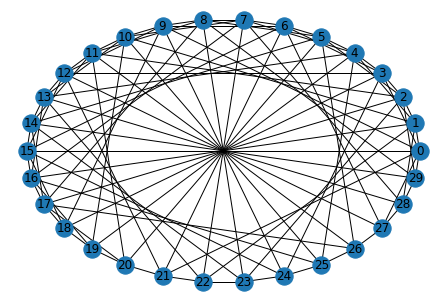

In [14]:
# let us construct a regular graph with 6m nodes, and degree of each node equal to m
m = 5
G = nx.cycle_graph(6*m)

n_nodes = 6*m

for n in range(6*m):
    for i in range(m):
        G.add_edge(n,(6*(i+1)+n-3) % 18)
        
print(G.edges)
pos = nx.circular_layout(G)

nx.draw(G,pos,with_labels=True)

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

In [12]:
w,v = np.linalg.eig(P)
w = w.real

print(w)

[-1.          1.         -0.52488952 -0.52280183 -0.48487248  0.52488952
  0.52280183  0.48487248 -0.41010154  0.41010154 -0.35293579 -0.31356298
 -0.27061836 -0.24909197 -0.22801768 -0.19026041  0.35293579  0.31356298
  0.27061836  0.24909197  0.22801768  0.19026041 -0.12892586  0.12892586
 -0.07951513 -0.03171327 -0.03535887  0.07951513  0.03171327  0.03535887]


The graph is bipartite, hence $-1$ is in the spectrum and the convergence to consensus is not guaranteed.

Let us now add a single edge to break the periodicity while mantaining the total number of edges.

[ 1.         -0.9836554  -0.53080863 -0.51343314 -0.48639675  0.52427039
  0.50347848  0.4966976  -0.41731173  0.41043809  0.35327071  0.34164528
 -0.3528659  -0.31426402  0.28893342  0.26433602  0.22877419  0.18484969
 -0.27192896 -0.26523542 -0.21543669 -0.18245434 -0.15294277  0.11609839
  0.08043962 -0.07670712 -0.04026661 -0.02695449  0.00172572  0.03570437]


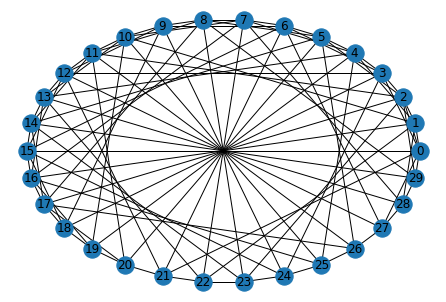

In [15]:
G.add_edge(0,2)
G.remove_edge(0,9)

nx.draw(G,pos,with_labels=True)

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

w,v = np.linalg.eig(P)
w = w.real

print(w)

The graph is not periodic now. However, $|\lambda_n| \sim 1$, which implies that the convergence of the dynamics is slow. On the other hand, $\lambda_2$ is "small" ($\sim 1/2$), thus the lazy dynamics converges quickly.

In some sense, $|\lambda_n| \sim 1$ reflects the fact that the graph is almost periodic. Let us see this with an example, by comparing the speed in convergence of the lazy dynamics and the standard dynamics.

In [33]:
# construct a larger graph
m = 50
G = nx.cycle_graph(6*m)

G.add_edge(0,2)

n_nodes = 6*m

for n in range(6*m):
    for i in range(m):
        G.add_edge(n,(6*(i+1)+n-3) % n_nodes)
        

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# let us start with random initial condition and standard dynamics
x0 = np.random.rand(G.number_of_nodes())>1/2
x = x0

variance = np.var(x)
t=0

while (variance>0.00001):
    x = P @ x
    t=t+1
    variance = np.var(x)
    if t>100000:
        t='inf'
        break
        
print('Number of iterations for convergence of standard dynamics:', t)

# same initial condition, lazy dynamics
x = x0

# Construct lazy P
Pl = P/2 + np.diag(np.ones(G.number_of_nodes()))/2

variance = np.var(x)
t=0

while (variance>0.00001):
    x = Pl @ x
    t=t+1
    variance = np.var(x)
    if t>100000:
        t='inf'
        break
        
print('Number of iterations for convergence of lazy dynamics:', t)

Number of iterations for convergence of standard dynamics: 10921
Number of iterations for convergence of lazy dynamics: 89


While the speed of convergence in the lazy dynamics depends only on the connectivity of the graph ($\lambda_2$), the speed of convergence in the standard dynamics depends both on the connectivity ($\lambda_2$) and the periodicity of the graph ($|\lambda_n|$). The example above shows that the standard averaging dynamics may converge slowly when the graph is a perturbation of a periodic graph, even if the graph is well-connected.

### Application: distributed computation of average

Let the node set describe a set of sensors that are deployed in some regions in order to collect measurements of some quantity of interest (for example, the temperature). 

Assume that these sensors have limited communication and computation capabilities that allow each of them to exchange information only with those other sensors that are close enough in space. 

Let the graph $G = (V, E)$ describe the pattern of vicinity among the sensors $i$ and $j$ so that there is an undirected link between node $i$ and node $j$ if they can communicate to each other (possibly using link weights decreasing with distance). Then, one can design a distributed algorithm for computing the average of the sensor's measurements based on the averaging dynamics.

Let $x_i(0)$ be the measurement of each node. 

We are interested in designing an iterative distributed algorithm that allows the nodes to compute

$$
x = \frac{1}{n}\sum_i x_i(0)
$$

**First attempt**: we run a consensus algorithm. Since the graph is undirected, $\pi_i = \frac{w_i}{\sum_j w_j}$. Thus, the algorithm converges to a consensus $\alpha \mathbf{1}$ such that

$$
\alpha = \sum_{i} \frac{w_i}{w} x_i(0),
$$

which differs from our goal.

If each node knows its degree $w_i$, each node can rescale its initial state, i.e., $y_i(0) = \frac{x_i(0)}{w_i}$. The consensus algorithm for the variable $y_i$ thus converges to

$$
\alpha_y = \sum_{i} \frac{w_i}{w} y_i(0) = \frac{1}{w} \sum_{i} x_i(0).
$$

If we assume that each node knows the average degree of the network $\overline{w}$, thus

$$
x = \alpha_y \frac{w}{n} = \alpha_y \overline{w}.
$$

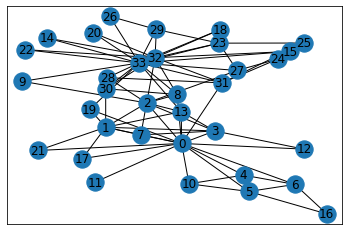

In [34]:
G = nx.karate_club_graph()

# Fix node positions on all pictures according to spring layout
pos = nx.spring_layout(G) 
nx.draw_networkx(G, pos)

n_nodes = len(G)

x = np.random.rand(n_nodes)

In [35]:
# Let us run the consensus algorithm for y

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

y = x/degrees

for t in range(1000):
    y = P @ y

print("average initial condition:", np.mean(x))
# choose arbitrarly the first node, but all the nodes reach consensus on y
print("average computed distributively", y[0] * np.sum(degrees) / n_nodes)

average initial condition: 0.5522149306394672
average computed distributively 0.552214930639466


The algorithm works! Unfortunately, requiring that each node knows the average degree of the network is not realistic and is not distributed, because it requires that each node has some global information on the network.

However, there exists another way to solve the problem in a distributed manner.

We run a second averaging dynamics, with initial condition $z_i(0) = \frac{1}{w_i}$.

This converges to

$$
\lim_{t \to + \infty} z_i(t) = \sum_i z_i(0) \frac{w_i}{w} = \sum_{i} \frac{1}{w} = n/w = 1/\overline{w}
$$

By combining the two, each node can estimate the average estimate by 

$$
\frac{\lim_{t \to + \infty} y_i(t)}{\lim_{t \to + \infty} z_i(t)} = \alpha_y / \overline{w} = x
$$

In [36]:
# Let us implement this

z = 1/degrees

for t in range(1000):
    z = P @ z

print("average state:", np.mean(x))
# choose arbitrarly the first node, but all the nodes reach consensus both on y and z
print("average computed distributively", y[0] / z[0])

average state: 0.5522149306394672
average computed distributively 0.5522149306394676


# <mark>Linear flow dynamics</mark>

In the second part of the lab we study how to simulate the linear averaging dynamics on graphs, which is the dual of linear averaging dynamics.

Let $G=(V,E,W)$ be a weighted graph, and $x(t) \in \mathrm{R}^{V}$ denote the total mass in the node of the graph.

The dynamics of $x(t)$ reads

$$
x(t+1) = P'x(t),
$$

where $P$ is the normalized adjacency matrix of the graph and is called in this context the **routing matrix**.
The routing matrix has the following interpretation: if $x_j$ is the total mass in node $j$, $P_{ji}$ is the fraction of the mass that will be routed to node $i$ at the next step, i.e.,

$$
x_i(t+1) = \sum_{j} P_{ji} x_j(t)
$$

**Theorem**: given a graph, assume that
- its condensation graph has 1 sink;
- the sink component of the graph is aperiodic;

Then,

$$
\lim_{t \to +\infty} x(t) = \beta \pi, \quad \beta = \mathbf{1}' x(0)
$$

i.e., the mass distribution will eventually converge to the invariant distribution centrality of the network, where the proportionality factor can be computed by using the fact that the total mass on the network is preserved, i.e.,

$$
\mathbf{1}' x(t) = \mathbf{1}' P' x(t-1) = \mathbf{1}' x(t-1).
$$

**Observation**: note that this problem is the dual of the averaging dynamics, in the sense that in the averaging $\pi' x(t)$ is constant and the dynamics converges to a state proportional to $\mathbf{1}$, whereas in the flow dynamics $\mathbf{1}' x(t)$ is constant and the dynamics converges to a state proportional to $\pi$.

**Observation**: note that the Theorem implies that under some conditions on the graph the invariant distribution centrality may be compute in a distributed way, by running the linear flow dynamics and normalizing the asymptotic state of the dynamics. 

### <span style="background-color: #00FF00">Linear flow dynamics with multiple sink components</span>

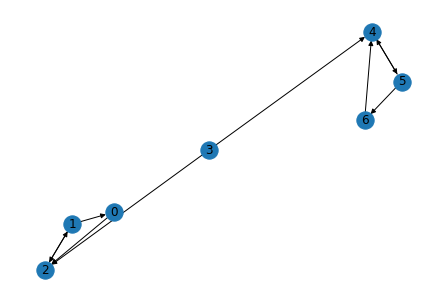

In [37]:
G = nx.DiGraph()
G.add_edges_from([(1,2),(2,1),(1,0),(0,2),(3,2),(3,4),(4,5),(5,4),(6,4),(5,6)])

# labels of nodes are couples: (column,row)
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True)

In [38]:
x = np.array([1,2,3,2,3,1,6])

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

x = P.T @ x
print("x(1):", x)

x = P.T @ x
print("x(2):", x)

x = P.T @ x
print("x(3):", x)

x = P.T @ x
print("x(4):", x)

x = P.T @ x
print("x(5):", x)

x = P.T @ P.T @ P.T @ P.T @ P.T @ x
print("x(10):", x)

x = P.T @ P.T @ P.T @ P.T @ P.T @ x
print("x(15):", x)

x = P.T @ P.T @ P.T @ P.T @ P.T @ x
print("x(20):", x)

x = P.T @ P.T @ P.T @ P.T @ P.T @ x
print("x(25):", x)

x = P.T @ P.T @ P.T @ P.T @ P.T @ x
print("x(30):", x)

x(1): [2.  4.5 0.5 0.  7.5 3.  0.5]
x(2): [4.5 1.5 1.  0.  2.  7.5 1.5]
x(3): [1.5  3.25 2.25 0.   5.25 2.   3.75]
x(4): [3.25 3.   0.75 0.   4.75 5.25 1.  ]
x(5): [3.    2.375 1.625 0.    3.625 4.75  2.625]
x(10): [2.90625 2.71875 1.375   0.      4.25    4.59375 2.15625]
x(15): [2.8203125  2.79296875 1.38671875 0.         4.38671875 4.4375
 2.17578125]
x(20): [2.80175781 2.80078125 1.39746094 0.         4.40136719 4.40332031
 2.1953125 ]
x(25): [2.79980469 2.80041504 1.39978027 0.         4.40075684 4.3996582
 2.19958496]
x(30): [2.79989624 2.80007935 1.40002441 0.         4.40014648 4.39981079
 2.20004272]


**Question 1** Note that in node 3 the mass converges to 0. Why?

**Question 2** Can you use the asymptotic state of the dynamics to deduce all the dominant eigenvectors of the graph?

### <span style="background-color: #00FF00">How to compute left dominant eigenvectors (invariant distributions) by linear flow dynamics</mark>

In [39]:
# at least a non-zero element in x[0], x[1], x[2] (first trapping set)
# at least a non-zero element in x[4], x[5], x[6] (second trapping set)
x = np.array([1,0,3,2,3,1,6])

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray()
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

for iter in range(100):
    x = P.T @ x

print("x(100):", x)

x(100): [2.  2.  1.  0.  4.4 4.4 2.2]


The graph above has two sink components (or trapping sets), both aperiodic.

Let us recall some properties on left dominant eigenvectors of $P$.

**Left dominant eigenvectors**: recall that 
- the eigenvalue 1 has multeplicity (both geometric and algebraic) equal to the number of sinks of the condensation graph;
- all the left dominant eigenevctors of $P$ has support on the nodes that belong to the trapping sets of the graph;
- dominant eigenvectors whose support belong to one trapping set only are called extremal;
- all the dominant eigenvectors can be obtained as a convex combination of extremal dominant eigenvectors.

To compute all the dominant eigenvectors, we run the dynamics with a non-zero mass in both the trapping sets of the graph.

The mass distribution in the trapping sets reaches an equilibrium (because both the trapping sets are aperiodic). 
Note indeed that eventually all the mass will flow out from non-trapping sets ($x[3] \to 0$). Once $x$ approaches zero for all the nodes not belonging to trapping sets, the dynamics in each trapping set becomes independent of the rest of the network. Thus, we can use theoretical results to guarantee that if a trapping set of the graph is aperiodic, then the dynamics on the subgraph will converge to the (unique) invariant distribution of the induced subgraph defined on the trapping set.

If the dynamics reaches an equilibrium, the resulting $x^*$ has to be left dominant eigenvector. However, if we run another dynamics with different initial condition we get another left dominant eigenvector...

In [40]:
# normalization
print("Left dominant eigenvector:", x/np.sum(x))

x = np.array([0,0,1,0,3,1,6])

for iter in range(100):
    x = P.T @ x

print("Left dominant eigenvector:", x/np.sum(x))

Left dominant eigenvector: [0.125  0.125  0.0625 0.     0.275  0.275  0.1375]
Left dominant eigenvector: [0.03636364 0.03636364 0.01818182 0.         0.36363636 0.36363636
 0.18181818]


We cannot try an infinite number of initial conditions...

To obtain all the dominant eigenvectors, we first obtain the two extremal ones $\pi^{(1)}$ and $\pi^{(2)}$, and then combine then by convex combination, i.e.,

$$
\pi = \alpha \pi^{(1)} + (1-\alpha) \pi^{(2)}, \quad \alpha \in [0,1].
$$

To compute the two extremal eigenvectors, we run a dynamics with non-zero initial condition on a trapping set only, e.g., for the first trapping set:

In [41]:
x = np.array([7,2,1,0,0,0,0])

for iter in range(100):
    x = P.T @ x

print("First extremal dominant eigenvector:", x/np.sum(x))

x = np.array([0,0,0,0,3,4,3])

for iter in range(100):
    x = P.T @ x

print("Second extremal dominant eigenvector:", x/np.sum(x))

First extremal dominant eigenvector: [0.4 0.4 0.2 0.  0.  0.  0. ]
Second extremal dominant eigenvector: [0.  0.  0.  0.  0.4 0.4 0.2]


### <span style="background-color: #00FF00">Linear flow dynamics on graph whose condensation graph has a unique sink (but not strongly connected)</span>

Let us now add a link in such a way that the condensation graph has now a single sink.

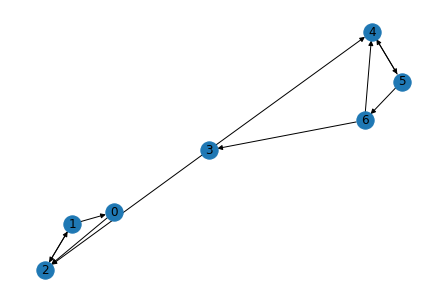

In [42]:
G.add_edge(6,3)
nx.draw(G, pos, with_labels=True)

**Question**: What kind of asymptotic state do you expect for this graph?

In [43]:
# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# define initial condition
x = [1, 1, 0, 1, 1, 0, 0]

for n in range(999):
    x = P.T @ x
print("x(1000):", x, "\n")

x(1000): [1.60000000e+00 1.60000000e+00 8.00000000e-01 6.68200851e-24
 2.28913919e-23 2.41048151e-23 1.26912797e-23] 



### <span style="background-color: #00FF00">Recap</span>

If the graph is not strongly connected, but its condensation graph has one sink:
- the averaging dynamics converges to a consensus, whose value depends only on the initial state of nodes of the sink;
- the linear flow dynamics converges to the dominant eigenvector of $P'$, which has support only on the nodes of the sink.

### <span style="background-color: #00FF00">Duality of the problems</span>
We are given an aperiodic graph whose condensation graph has 1 sink. Let $x(0)$ be the initial state.

We can compute the asymptotic consensus value without making computation.

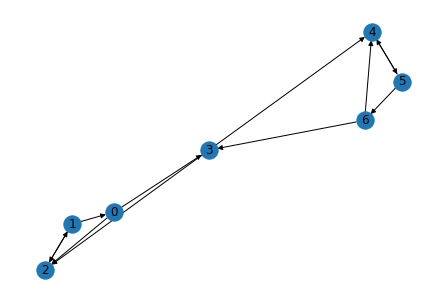

In [44]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3,4,5,6])
G.add_edges_from([(1,2),(2,1),(1,0),(0,2),(3,2),(3,4),(4,5),(5,4),(6,4),(5,6),(6,3),(0,3)])
# labels of nodes are couples: (column,row)
nx.draw(G, pos, with_labels=True)

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

In [45]:
x = np.random.rand(7)

# compute \pi by running the mass dynamics with a normalized initial condition y
# the asymptotic state will be exactly \pi.

y = np.random.rand(7)
y = y/np.sum(y)

for iter in range(500):
    y = P.T @ y

# the consensus value is pi.T @ x, but y(t) --> \pi, thus we can use y instead of \pi.
print("The consensus value:", y.T @ x)

The consensus value: 0.2637873329436262


In [46]:
# check the result by running the averaging dynamics
for iter in range(500):
    x = P @ x
    
print("The asymptotic state x:", x)

The asymptotic state x: [0.26378733 0.26378733 0.26378733 0.26378733 0.26378733 0.26378733
 0.26378733]


# <mark>Linear averaging dynamics with stubborn agents</mark>
We study how to simulate the linear averaging dynamics on graphs in presence of stubborn agents.

We focus on the optimal placement problem, which consists of optimally chosing the position of a stubborn node on the graph in order to maximize its influence on the asymptotic outcome of the dynamics.

Let us first summarize the theory in presence of stubborn agents.

We are given a network, where the agents $V$ are divided in regular agents $R$ and stubborn agents $S$. The regular agents update their opinion $x(t)$ according to the standard DeGroot model, while the stubborn agents do not update their opinion $u(t) \equiv u$.

Let $Q=P|_{R \times R}$ and $E=P|_{R \times S}$.

Thus, the dynamics for the regular agents read:

$$
x(t+1) = Qx(t) + Eu.
$$

Under some assumptions (see the lecture notes for details) the dynamics converges to 

$$
x^* = (\mathbf{I}-Q)^{-1}Eu.
$$

Note that:
- the asymptotic state is not a consensus;
- the asymptotic state does not depend on the initial opinions.

### <span style="background-color: #00FF00">Implementation</span>

We start by implementing the averaging dynamics with stubborn nodes. 

To illustrate this procedure, we will analyse the following example that involves a $3 \times 4$ grid graph $\mathcal G$.

Number of nodes: 12
[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2)]


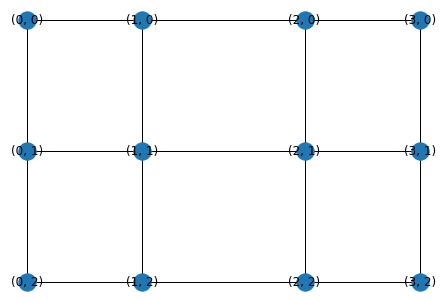

In [66]:
G = nx.generators.lattice.grid_graph(dim=[3,4])
n_nodes = len(G)
print("Number of nodes:", n_nodes)

# labels of nodes are couples: (column,row)
nx.draw_spectral(G, with_labels=True)

print(G.nodes())

In [67]:
# Construct a dictionary that maps the label of nodes  
# (from (0,0) to (2,1)) to their index (from 0 to n_nodes-1)
indices = dict()
for i in range(n_nodes):
    indices[list(G.nodes)[i]] = i
print(indices)

{(0, 0): 0, (0, 1): 1, (0, 2): 2, (1, 0): 3, (1, 1): 4, (1, 2): 5, (2, 0): 6, (2, 1): 7, (2, 2): 8, (3, 0): 9, (3, 1): 10, (3, 2): 11}


In [68]:
# Number of iterations
n_iter = 50;
    
# Stubborn and regular nodes
stubborn = [(0,0), (3,2)];
stubborn_id = [indices.get(key) for key in stubborn]
regular = [node for node in G.nodes if node not in stubborn]
regular_id = [id for id in range(n_nodes) if id not in stubborn_id]
print("Stubborn nodes:", stubborn, "\n")
print("Regular nodes:", regular, "\n")

# Input to stubborn nodes
u = [0,1]

# P matrix
A = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
A = A.toarray() # convert A to a numpy array
degrees = np.sum(A,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ A
print("P", P.shape, ":\n", P)
# Submatrices
# Using ix_ one can construct index arrays that will 
# index a cross product. 
# a[np.ix_([1,3],[2,5])] returns the array [[a[1,2] a[1,5]], [a[3,2] a[3,5]]].
Q = P[np.ix_(regular_id, regular_id)]
E = P[np.ix_(regular_id, stubborn_id)]
print("Q:", Q.shape, ":\n", Q)
print("E:", E.shape, "\n", E)

# Sample a random initial condition for regular nodes
ic = np.random.uniform(0,1,len(regular))

# Set the initial condition for the dynamics
x = np.zeros((n_nodes,n_iter))
x[stubborn_id,0] = u;
x[regular_id,0] = ic;
print("Initial state:", x[:,0], "\n")

Stubborn nodes: [(0, 0), (3, 2)] 

Regular nodes: [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1)] 

P (12, 12) :
 [[0.         0.5        0.         0.5        0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.         0.33333333 0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.         0.5
  0.         0.         0.         0.         0.         0.        ]
 [0.33333333 0.         0.         0.         0.33333333 0.
  0.33333333 0.         0.         0.         0.         0.        ]
 [0.         0.25       0.         0.25       0.         0.25
  0.         0.25       0.         0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.33333333 0.
  0.         0.         0.33333333 0.         0.         0.        ]
 [0.         0.         0.         0.33333333 0.         0.
  0.         0.3

In [69]:
# Evolve the opinion vector
for t in range(1,n_iter):
    x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
    x[stubborn_id, t] = x[stubborn_id, t-1];

print("Final state:")
x_final = x[:,n_iter-1]
for key in indices.keys():
    print(key, x_final[indices[key]])

Final state:
(0, 0) 0.0
(0, 1) 0.2639185780879816
(0, 2) 0.3806535352146365
(1, 0) 0.30523232794614785
(1, 1) 0.41370764514202085
(1, 2) 0.4951162955485185
(2, 0) 0.5046357831695287
(2, 1) 0.5860538074370216
(2, 2) 0.694585295137216
(3, 0) 0.619106072697541
(3, 1) 0.7359018726181706
(3, 2) 1.0


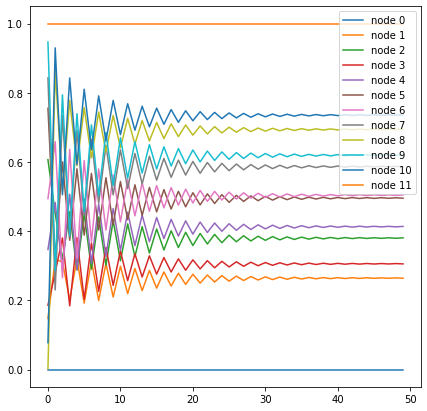

In [70]:
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for node in range(n_nodes):
    trajectory = x[node,:]
    ax.plot(trajectory, label='node {0:d}'.format(node))
    
ax.legend()

In [71]:
average = np.average(x_final)
print("Average asymptotic opinion:", average)

Average asymptotic opinion: 0.49990926774989863


As expected, the dynamics does not converge to consensus. Moreover, in contrast with averaging without input stubborn nodes, we can verify that the asymptotic equilibrium does not depend on the initial condition. Furthermore, the dynamics converge to an equilibrium even though the graph is periodic.

Initial state: [0.         0.76031091 0.08154963 0.97017701 0.09257246 0.2395702
 0.78648556 0.19397685 0.34156453 0.85401449 0.28586635 1.        ] 

Final state:
(0, 0) 0.0
(0, 1) 0.2639345289920626
(0, 2) 0.38035163239257463
(1, 0) 0.3052485333180778
(1, 1) 0.4134080554754616
(1, 2) 0.49513832106716515
(2, 0) 0.5043244154706692
(2, 1) 0.5860750040809559
(2, 2) 0.6943562493633624
(3, 0) 0.6191274358800537
(3, 1) 0.7356763736938952
(3, 2) 1.0


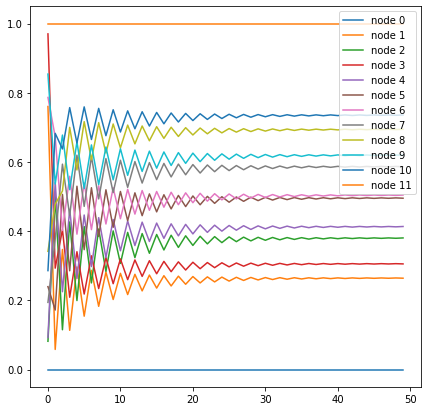

In [72]:
# Sample another random initial condition for regular nodes
ic = np.random.uniform(0,1,len(regular))

x = np.zeros((n_nodes,n_iter))
x[stubborn_id,0] = u;
x[regular_id,0] = ic;
print("Initial state:", x[:,0], "\n")

# Evolve the opinion vector
for t in range(1,n_iter):
    x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
    x[stubborn_id, t] = x[stubborn_id, t-1];

print("Final state:")
x_final = x[:,n_iter-1]
for key in indices.keys():
    print(key, x_final[indices[key]])
    
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for node in range(n_nodes):
    trajectory = x[node,:]
    ax.plot(trajectory, label='node {0:d}'.format(node))
    
ax.legend()

## <span style="background-color: #00FF00">Optimal placement of stubborn nodes</span>
Suppose that node $(0,0)$ is stubborn with opinion $u_{(0,0)}=0$. We want to find the optimal position $(i,j)$ of a stubborn node with opinion $1$ in order to maximize the asymptotic average opinion.

A very simple approach is to consider all possible positions $(i,j)$ and pick the best one.

In [73]:
# Number of iterations
n_iter = 50;

# We will store final opinion vectors and 
# average of final opinions in dictionaries
# where the key is the position (i,j) of the 
# 1-stubborn agent
final_opinions = dict()
average_opinion = dict() 


for (i,j) in G.nodes:
    # Position (0,0) is occupied by the 0-stubborn node
    if (i,j)==(0,0):
        continue
        
    # Stubborn and regular nodes
    stubborn = [(0,0), (i,j)];
    stubborn_id = [indices.get(key) for key in stubborn]
    regular = [node for node in G.nodes if node not in stubborn]
    regular_id = [id for id in range(n_nodes) if id not in stubborn_id]
    print("Stubborn nodes:", stubborn)

    # Input to stubborn nodes
    u = [0,1]


    # P matrix
    A = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
    A = A.toarray() # convert A to a numpy array
    degrees = np.sum(A,axis=1)
    D = np.diag(degrees)
    P = np.linalg.inv(D) @ A

    # Submatrices
    Q = P[np.ix_(regular_id, regular_id)]
    E = P[np.ix_(regular_id, stubborn_id)]

    # Sample a random initial condition for regular nodes
    ic = np.random.uniform(0,1,len(regular))

    # Set the initial condition for the dynamics
    x = np.zeros((n_nodes,n_iter))
    x[stubborn_id,0] = u;
    x[regular_id,0] = ic;

    for t in range(1,n_iter):
        x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
        x[stubborn_id, t] = x[stubborn_id, t-1];

    final_opinions[(i,j)] = x[:,n_iter-1]
    average_opinion[(i,j)] = np.average(final_opinions[(i,j)])
    print("Average opinion:", average_opinion[(i,j)], "\n")

Stubborn nodes: [(0, 0), (0, 1)]
Average opinion: 0.6266231899716421 

Stubborn nodes: [(0, 0), (0, 2)]
Average opinion: 0.5026533024746614 

Stubborn nodes: [(0, 0), (1, 0)]
Average opinion: 0.6705673794497478 

Stubborn nodes: [(0, 0), (1, 1)]
Average opinion: 0.713629337902375 

Stubborn nodes: [(0, 0), (1, 2)]
Average opinion: 0.603032551807161 

Stubborn nodes: [(0, 0), (2, 0)]
Average opinion: 0.6019571036275786 

Stubborn nodes: [(0, 0), (2, 1)]
Average opinion: 0.6588778183761236 

Stubborn nodes: [(0, 0), (2, 2)]
Average opinion: 0.5884129007705331 

Stubborn nodes: [(0, 0), (3, 0)]
Average opinion: 0.49924056072155726 

Stubborn nodes: [(0, 0), (3, 1)]
Average opinion: 0.5578951182350016 

Stubborn nodes: [(0, 0), (3, 2)]
Average opinion: 0.49987141532994445 



To visualize the dependence of the average asymptotic opinion on the position of the $1$-stubborn node we can plot the grid graph by setting each node's size and color according to the magnitude of the average asymptotic opinion when the $1$-stubborn is placed in such node.

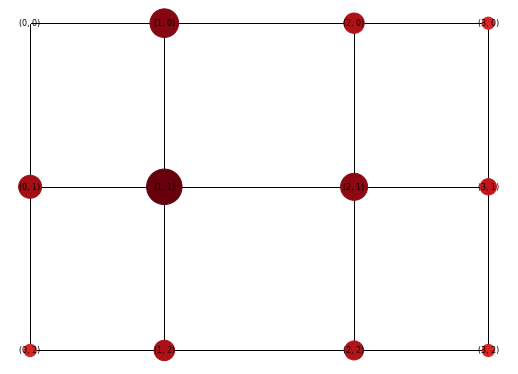

In [75]:
# add a dummy (0,0) entry to the dictionary
# to make its size = n_nodes
average_opinion[(0,0)] = 0

plt.figure(1, figsize=(7,5))
nx.draw(G, 
        pos = nx.spectral_layout(G),
        with_labels=True, 
        node_size = [np.exp(10*average_opinion[node]) for node in G.nodes],
        node_color= [average_opinion[node] for node in G.nodes],
        font_size=8,
        # node's colors are on the red scale
        cmap=plt.cm.Reds)

The optimal placements of the 1-stubborn player are the maximizers of the final average opinion:

In [76]:
# convert the average opinion values from dict_values to numpy array
avg = np.fromiter(average_opinion.values(),dtype=float)

optimal_place = [place for place in average_opinion.keys() if average_opinion[place]==np.max(avg)]
print("Optimal placements:", optimal_place)

print(optimal_place)

# print the final opinions under optimal placement
opt_final = final_opinions.get(*optimal_place)
print(opt_final)

Optimal placements: [(1, 1)]
[(1, 1)]
[0.         0.57015808 0.71107019 0.57785458 1.         0.85109863
 0.73508795 0.84847668 0.8444738  0.77554252 0.81961814 0.83017148]


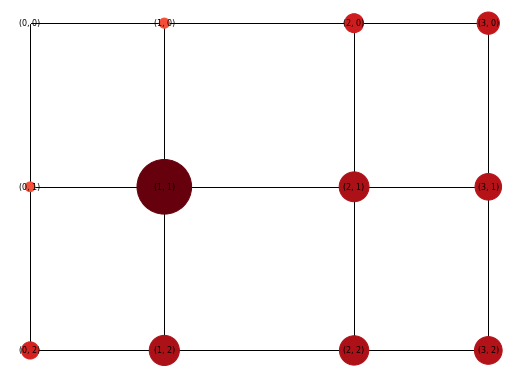

In [78]:
# plot the asymptotic opinions of the nodes when the stubborn is placed in (1,1)

plt.figure(1, figsize=(7,5))
nx.draw(G, 
        pos = nx.spectral_layout(G),
        with_labels=True, 
        node_size = [np.exp(8*opt_final[indices.get(node)]) for node in G.nodes],
        node_color= [opt_final[indices.get(node)] for node in G.nodes],
        font_size=8,
        # node's colors are on the red scale
        cmap=plt.cm.Reds)

### <span style="background-color: #00FF00">Back to an old example</span>

Average final opinions: 0.9944568349086351


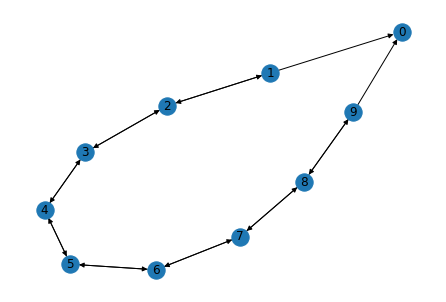

In [79]:
G = nx.cycle_graph(10)
G = nx.Graph.to_directed(G)
G.remove_edges_from([(0,1),(0,9)])
G.add_edge(0,0)

nx.draw(G, with_labels=True)

n_nodes = G.number_of_nodes()

# Construct P
W = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
W = W.toarray() # convert A to a numpy array
degrees = np.sum(W,axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

n_iter = 100
x = np.zeros((10,n_iter))

# set initial condition (1,0,0,0,0,0,0,0,0,0)
x[0,0] = 1

# evolve the states
for t in range(1,n_iter):
    x[:,t] = P @ x[:,t-1]

print("Average final opinions:", np.mean(x[:,n_iter-1]))

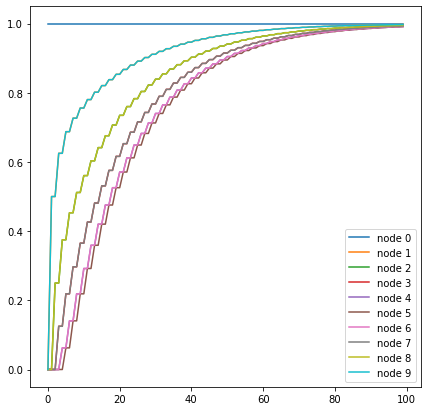

In [80]:
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for node in range(G.number_of_nodes()):
    trajectory = x[node,:]
    ax.plot(trajectory, label='node {0:d}'.format(node))
    
ax.legend()

We can prove that this is equivalent to having node 0 stubborn with opinion 1.

Indeed, note that because of the topology of the graph, the opinion of node 0 is not influenced by anyone. The same dynamics can be obtained by assuming that node 0 is stubborn.

In [81]:
# Stubborn and regular nodes
stubborn = [0];
regular = [node for node in G.nodes if node not in stubborn]

print("Stubborn nodes:", stubborn, "\n")
print("Regular nodes:", regular, "\n")

# Input to stubborn nodes
u = [1]

# Submatrices
Q = P[np.ix_(regular, regular)]
E = P[np.ix_(regular, stubborn)]

# Set the initial condition for the dynamics
x = np.zeros((n_nodes,n_iter))
x[stubborn,0] = u;
print("Initial condition:", x[:,0], "\n")

# Evolve the opinion vector
for t in range(1,n_iter):
    x[regular, t] = Q @ x[regular, t-1] + E @ x[stubborn, t-1]
    x[stubborn, t] = x[stubborn, t-1];

x_final = x[:,n_iter-1]
print(x_final)

Stubborn nodes: [0] 

Regular nodes: [1, 2, 3, 4, 5, 6, 7, 8, 9] 

Initial condition: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

[1.         0.99735337 0.99470675 0.99307104 0.99143534 0.99143534
 0.99143534 0.99307104 0.99470675 0.99735337]


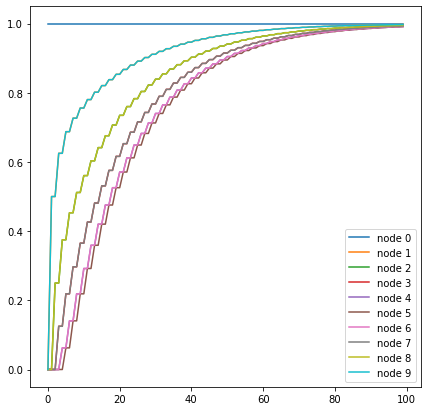

In [82]:
fig = plt.figure(1, figsize=(7,7))
ax = plt.subplot(111)

for node in range(G.number_of_nodes()):
    trajectory = x[node,:]
    ax.plot(trajectory, label='node {0:d}'.format(node))
    
ax.legend()

Same trajectory as before!

### <span style="background-color: #00FF00">A more general model: overview on Friedkin-Johnsen model</span>
The French-DeGroot dynamics can be generalized by taking into account that each agents is not completely regular or completely stubborn. The opinion of each agents is in part due to "innate" opinions, and in part due to influence of society.

The following opinion dynamics model is known as Friedkin-Johnsen model.
Here:
- $x_i(t)$ is the opinion of the agent $i$;
- $y_i$ is the innate opinion of agent $i$.
- $\alpha_i$ is its level of stubborness, i.e., the level of confidence in his/her opinion $y_i$.

The dynamics reads:

$$
x_i(t+1) = \alpha_i y_i + (1-\alpha_i) \sum_{j} P_{ij} x_j(t).
$$

If $\alpha = \mathbf{0}$, we get the French-DeGroot model without input.

If $\alpha \in \{0,1\}^{V}$, we get the French-DeGroot model with stubborn nodes.

As the French-DeGroot model with input, also the Friedkin-Johnsen dynamics converges to a non-consensus state, which depends on $\alpha, y$, but not on the initial opinions $x(0)$.